# Árvores II - Tarefa I

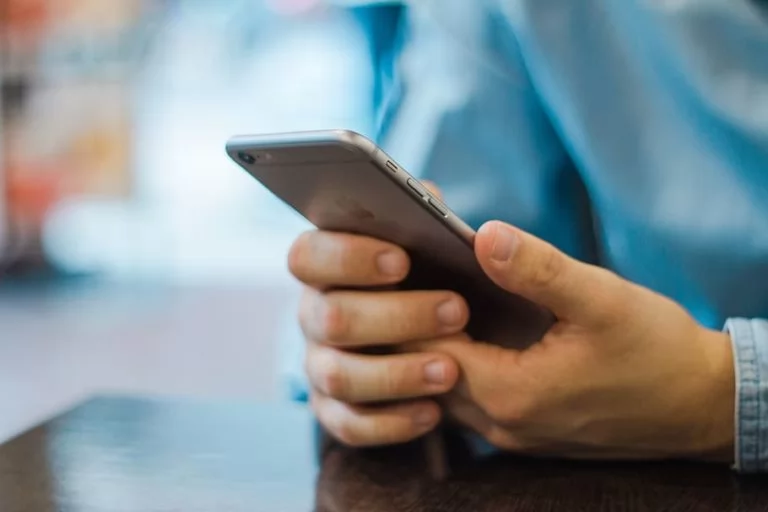  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colormaps
import graphviz

from IPython.display import display, HTML
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Carregando as bases de dados
feat = pd.read_csv("features.txt", delimiter = ";", header = None, names = ["Variável"])
treino = pd.read_csv("subject_train.txt", delimiter=' ', header = None, names = ["Indivíduo"])
teste = pd.read_csv("subject_test.txt", delimiter=' ', header = None, names = ["Indivíduo"])
y_tr = pd.read_csv("y_train.txt", delimiter=' ', header = None, names = ["Atividade"])
y_tt = pd.read_csv("y_test.txt", delimiter=' ', header = None, names = ["Atividade"])

In [3]:
# Nome das colunas como variável:
col_names = feat["Variável"].tolist()

# Tratamento da base de X_train:
X_tr = pd.read_csv("X_train.txt", sep=r"\s+", engine="python", header = None, names = col_names)
X_tr["Indivíduo"] = treino["Indivíduo"]
X_tr["Indicador"] = (treino.groupby("Indivíduo").cumcount() + 1).astype(int)

In [4]:
#Tratamento da base de X_test:
X_tt = pd.read_csv("X_test.txt", sep=r"\s+", engine="python", header = None, names = col_names)
X_tt["Indivíduo"] = teste["Indivíduo"]
X_tt["Indicador"] = (teste.groupby("Indivíduo").cumcount() + 1).astype(int)

In [5]:
if X_tr.isna().sum().any():
    print(f"Valores ausentes encontrados:\n{X_tr.isna().sum()}")
else:
    print("Valores ausentes não encontrados")

Valores ausentes não encontrados


In [6]:
if X_tt.isna().sum().any():
    print(f"Valores ausentes encontrados:\n{X_tt.isna().sum()}")
else:
    print("Valores ausentes não encontrados")

Valores ausentes não encontrados


In [7]:
print("Base de Treino Indicativa dos Resultados por Indivíduos (X_train.txt):")
display(X_tr.head())

print ("----" * 30)

print("Base de Teste Indicativa dos Resultados por Indivíduos (X_test.txt):")
display(X_tt.head())

Base de Treino Indicativa dos Resultados por Indivíduos (X_train.txt):


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",Indivíduo,Indicador
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,3
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,4
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5


------------------------------------------------------------------------------------------------------------------------
Base de Teste Indicativa dos Resultados por Indivíduos (X_test.txt):


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",Indivíduo,Indicador
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,1
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,3
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,4
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5


In [8]:
# Salvando as bases
X_tr.to_csv("X_tr.csv")
X_tt.to_csv("X_tt.csv")
print("Arquivos salvos!!")
gif_url = "https://media.licdn.com/dms/image/v2/D4D12AQGoqiEJdkoNkg/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1709148637810?e=1747872000&v=beta&t=Ud8XyC2jS6mwt3iR8kCJDiagvtc7stauqFbMdTuv4sY"
display(HTML(f'<img src="{gif_url}" width="300px">'))

Arquivos salvos!!


In [9]:
X_tr = X_tr[["1 tBodyAcc-mean()-X", "2 tBodyAcc-mean()-Y", "3 tBodyAcc-mean()-Z"]]
X_tr.head(2)

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z
0,0.288585,-0.020294,-0.132905
1,0.278419,-0.016411,-0.123520


In [10]:
X_tt = X_tt[["1 tBodyAcc-mean()-X", "2 tBodyAcc-mean()-Y", "3 tBodyAcc-mean()-Z"]]
X_tt.head(2)

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z
0,0.257178,-0.023285,-0.014654
1,0.286027,-0.013163,-0.119083


### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

Resultados da Árvore de Decisão na base de testes:
CPU times: total: 62.5 ms
Wall time: 64.2 ms


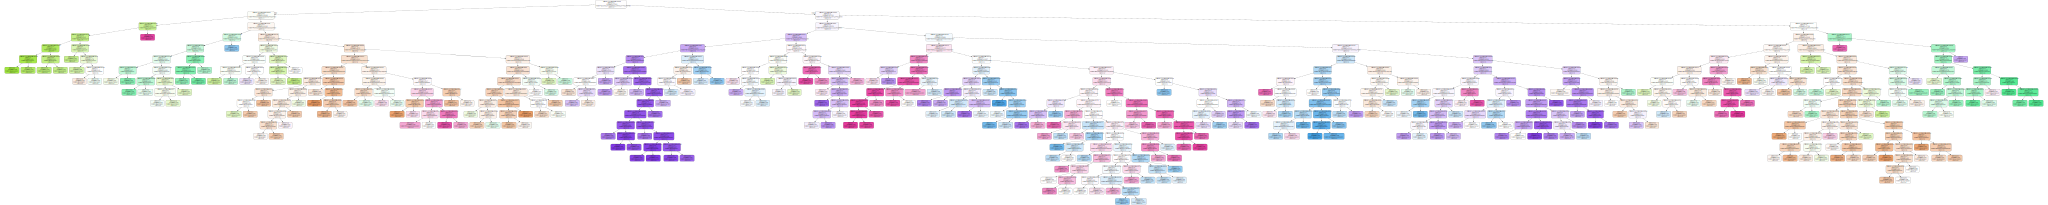

In [11]:
%%time
# 2.1 Ajustando a árvoe de decisão

print("Resultados da Árvore de Decisão na base de testes:")
tree20 = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
tree20 = tree20.fit(X_tr, y_tr)

tree_dot = export_graphviz(tree20, 
                           out_file=None, 
                           feature_names=X_tr.columns, 
                           class_names=[str(cls) for cls in y_tr["Atividade"].unique()],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

tree_viz = graphviz.Source(tree_dot)
tree_viz

In [12]:
%%time
# 2.2 Cálculo do ccp_alphas
path = tree20.cost_complexity_pruning_path(X_tr, y_tr)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas = ccp_alphas[ccp_alphas > 0]  # Apenas valores positivos
ccp_alphas = np.unique(ccp_alphas)  # Apenas valores únicos

print("Número total de ccp_alphas únicos e positivos:", len(ccp_alphas))
print("Primeiros 5 valores de ccp_alphas:", ccp_alphas[:5])

Número total de ccp_alphas únicos e positivos: 232
Primeiros 5 valores de ccp_alphas: [6.96674540e-06 1.12766571e-05 2.02554065e-05 2.72034820e-05
 2.84988860e-05]
CPU times: total: 78.1 ms
Wall time: 40.2 ms


In [13]:
%%time
# 2.3 Selecionando 1 a cada 5 valores de ccp_alpha
print("\n2.3 Selecionando 1 a cada 5 valores de ccp_alpha:")
ccp_alphas_reduced = ccp_alphas[::5]  # Slicing para pegar 1 a cada 5
print("Número de ccp_alphas reduzidos:", len(ccp_alphas_reduced))
print ("----" * 30)
print("Valores de ccp_alphas reduzidos:", ccp_alphas_reduced)


2.3 Selecionando 1 a cada 5 valores de ccp_alpha:
Número de ccp_alphas reduzidos: 47
------------------------------------------------------------------------------------------------------------------------
Valores de ccp_alphas reduzidos: [6.96674540e-06 4.63397246e-05 6.73768888e-05 8.28222484e-05
 1.02953015e-04 1.20580361e-04 1.41963138e-04 1.50482754e-04
 1.64239147e-04 1.78985873e-04 1.89796602e-04 2.03119333e-04
 2.05888258e-04 2.11960464e-04 2.26826797e-04 2.39444770e-04
 2.47932477e-04 2.52885177e-04 2.62495937e-04 2.73408734e-04
 2.83037295e-04 2.87980319e-04 3.13171720e-04 3.26787621e-04
 3.51668945e-04 3.73564446e-04 3.99220300e-04 4.29862753e-04
 4.51528412e-04 4.63079099e-04 4.87208882e-04 5.11794978e-04
 5.25732429e-04 5.56286552e-04 6.37883381e-04 7.02050790e-04
 7.53735819e-04 8.64950391e-04 9.29376560e-04 1.13240843e-03
 1.24197638e-03 1.65230695e-03 2.18765587e-03 2.66788979e-03
 3.13001880e-03 4.73006126e-03 1.05395082e-02]
CPU times: total: 0 ns
Wall time: 0 ns


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [14]:
%%time
# 3.1 Criando uma coleção de árvores para cada ccp_alpha reduzido
trees = []
for alpha in ccp_alphas_reduced:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    tree.fit(X_tr, y_tr)
    trees.append(tree)
    trees
    
depths = [tree.get_depth() for tree in trees]  
print("Profundidades únicas:", np.unique(depths))

Profundidades únicas: [ 4  5  8  9 10 11 14 17 22 23 24 25 26 27 29 31]
CPU times: total: 3.94 s
Wall time: 3.95 s


In [15]:
%%time
# 3.2 Cálculo da acurácia
tr = [tree.score(X_tr, y_tr) for tree in trees]  
tt  = [tree.score(X_tt, y_tt) for tree in trees]  

CPU times: total: 812 ms
Wall time: 819 ms


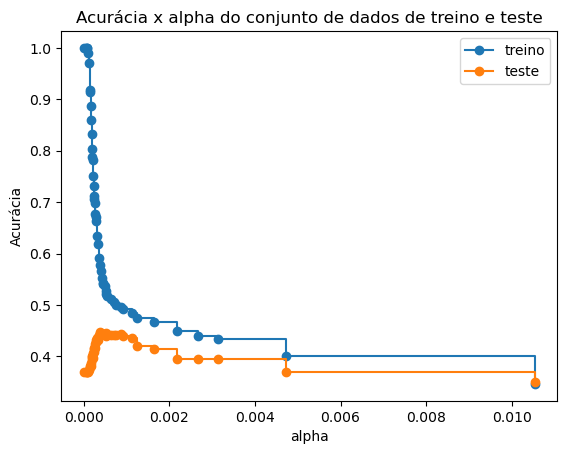

CPU times: total: 141 ms
Wall time: 140 ms


In [16]:
%%time
# 3.3 Gráfico de acurácia em função do ccp_alpha em ambas bases
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas_reduced, tr, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas_reduced, tt, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

In [17]:
%%time
# 3.4 Melhor árvore na base de teste
indice = len(tt) - tt[::-1].index(max(tt)) - 1 
best_tree = trees[indice]
best_alpha = ccp_alphas_reduced[indice]
best_tt = tt[indice]

print("Melhor árvore selecionada:")
print(f"Melhor ccp_alpha: {best_alpha:.6f}")
print(f"Profundidade da melhor árvore: {best_tree.get_depth()}")

Melhor árvore selecionada:
Melhor ccp_alpha: 0.000374
Profundidade da melhor árvore: 17
CPU times: total: 0 ns
Wall time: 0 ns


In [18]:
%%time
#3.5 Melhor acurácia possível
print("Melhor acurácia possível com as 3 variáveis:")
print(f"Acurácia máxima na base de teste: {best_tt:.4f}")

Melhor acurácia possível com as 3 variáveis:
Acurácia máxima na base de teste: 0.4469
CPU times: total: 0 ns
Wall time: 0 ns


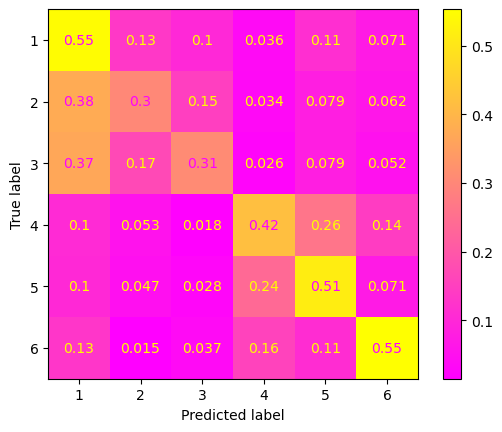

In [23]:
ConfusionMatrixDisplay.from_estimator(
    best_tree,          
    X_tt,              
    y_tt,              
    cmap=plt.cm.spring, 
    normalize='true'
)

Os valores apresentados pelo modelo apresenta uma pequena variação entre os menores e os maiores, valores de acurácia dessa melhor árvore de decisão desenvolvida. Os valores indicados apresentam um acerto médio máximo de 55%, sendo este um valor baixo para que a aplicação do modelo na tomada de decisões.